# 🏅 Exploratory Data Analysis - Olympic Games Data

## Projekt_OS - Olympic Games Data Analysis

Detta notebook innehåller en grundlig utforskning av olympisk data från Kaggle-datasetet "120 years of Olympic history: athletes and results".

### Dataset Information
- **Källa**: [120 years of Olympic history: athletes and results](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results)
- **Fil**: `athlete_events.csv`
- **Storlek**: ~200MB, 271,116 rader, 15 kolumner
- **Tidsperiod**: 1896-2016
- **Fokus**: Kanada (CAN)

### Innehåll
1. Data Loading och Översikt
2. Grundläggande Statistik
3. Visualiseringar
4. Kanada-specifik Analys

## 1. Imports och Data Loading

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Sätt stil för visualiseringar
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Ladda data
data_path = os.path.join('..', 'data', 'athlete_events.csv')
df = pd.read_csv(data_path)
# Ensure figures directory exists to avoid FileNotFoundError when saving plots
figures_dir = os.path.join('..', 'figures')
os.makedirs(figures_dir, exist_ok=True)

print(f"Dataset shape: {df.shape}")
print(f"\nKolumner: {df.columns.tolist()}")
print(f"\nFörsta raderna:")
df.head()

Dataset shape: (271116, 15)

Kolumner: ['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']

Första raderna:


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## 2. Grundläggande Statistik

### 2.1 Dataset Översikt

In [28]:
# Dataset information
print("="*60)
print("DATASET ÖVERSIKT")
print("="*60)
print(f"Antal rader: {len(df):,}")
print(f"Antal kolumner: {len(df.columns)}")
print(f"\nData typer:")
print(df.dtypes)
print(f"\nSaknade värden:")
print(df.isnull().sum())

DATASET ÖVERSIKT
Antal rader: 271,116
Antal kolumner: 15

Data typer:
ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

Saknade värden:
ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


### 2.2 Länder (NOC)

In [29]:
# a) Antal länder
num_countries = df['NOC'].nunique()
print(f"a) Antal länder: {num_countries}")

# b) Lista över länder
countries = sorted(df['NOC'].unique())
print(f"\nb) Länder (första 20): {countries[:20]}")
print(f"\nTotalt antal unika länder: {len(countries)}")


a) Antal länder: 230

b) Länder (första 20): ['AFG', 'AHO', 'ALB', 'ALG', 'AND', 'ANG', 'ANT', 'ANZ', 'ARG', 'ARM', 'ARU', 'ASA', 'AUS', 'AUT', 'AZE', 'BAH', 'BAN', 'BAR', 'BDI', 'BEL']

Totalt antal unika länder: 230


### 2.3 Sporter


In [30]:
sports = sorted(df['Sport'].unique())
print(f"c) Totalt antal sporter: {len(sports)}")
print(f"\nSporter (första 20): {sports[:20]}")


c) Totalt antal sporter: 66

Sporter (första 20): ['Aeronautics', 'Alpine Skiing', 'Alpinism', 'Archery', 'Art Competitions', 'Athletics', 'Badminton', 'Baseball', 'Basketball', 'Basque Pelota', 'Beach Volleyball', 'Biathlon', 'Bobsleigh', 'Boxing', 'Canoeing', 'Cricket', 'Croquet', 'Cross Country Skiing', 'Curling', 'Cycling']


### 2.4 Medaljtyper


In [31]:
medal_types = df['Medal'].dropna().unique()
print(f"d) Medaljtyper: {medal_types}")
print(f"\nTotalt antal medaljer: {df['Medal'].notna().sum()}")


d) Medaljtyper: ['Gold' 'Bronze' 'Silver']

Totalt antal medaljer: 39783


### 2.5 Åldersstatistik


In [32]:
ages = df['Age'].dropna()
print(f"e) Ålder - Medel: {ages.mean():.1f}, Median: {ages.median():.1f}, "
      f"Min: {ages.min()}, Max: {ages.max()}, Std: {ages.std():.1f}")


e) Ålder - Medel: 25.6, Median: 24.0, Min: 10.0, Max: 97.0, Std: 6.4


## 3. Visualiseringar - Översikt

### 3.1 Könsfördelning


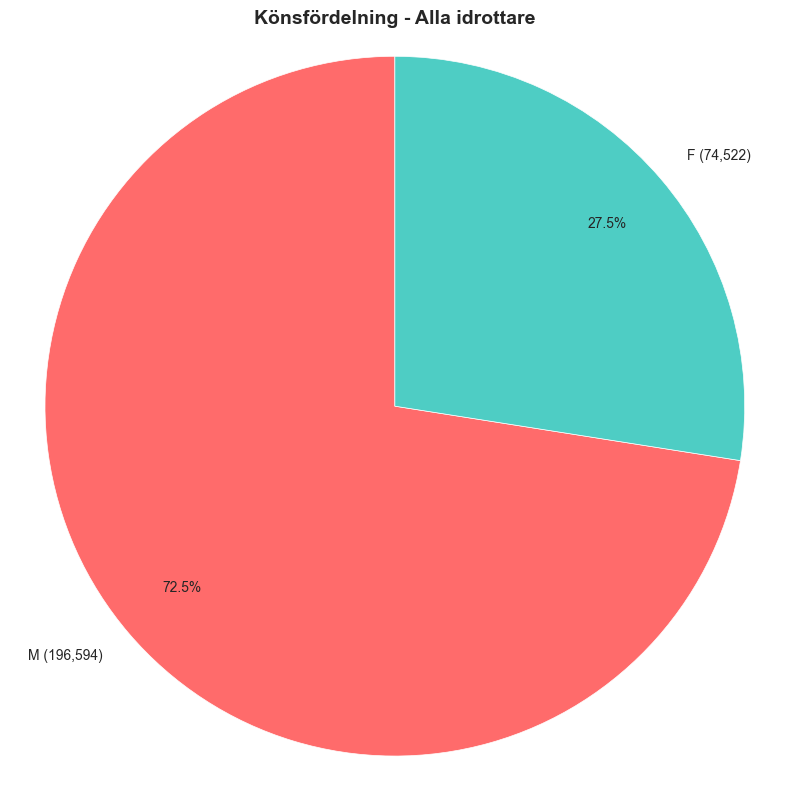

In [33]:
# Ensure imports are available (run Cell 2 first if not already run)
try:
    plt
except NameError:
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np

# Check if df exists (data should be loaded in Cell 2)
if 'df' not in globals():
    raise NameError("Please run Cell 2 first to load the data!")

# 3.1 Gender distribution - Create own figure
fig, ax = plt.subplots(figsize=(8, 8))
gender_counts = df['Sex'].value_counts(dropna=False)
if gender_counts.sum() > 0:
    labels = [f"{lbl} ({cnt:,})" for lbl, cnt in zip(gender_counts.index, gender_counts.values)]
    ax.pie(gender_counts.values, labels=labels,
           autopct='%1.1f%%', colors=['#FF6B6B', '#4ECDC4'], startangle=90,
           wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'}, pctdistance=0.8)
    ax.set_title('Könsfördelning - Alla idrottare', fontsize=14, fontweight='bold')
    ax.axis('equal')
else:
    ax.text(0.5, 0.5, 'Ingen data för kön', ha='center', va='center')

plt.tight_layout()
plt.savefig('../figures/gender_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


### 3.2 Top 10 Länder - Medaljer


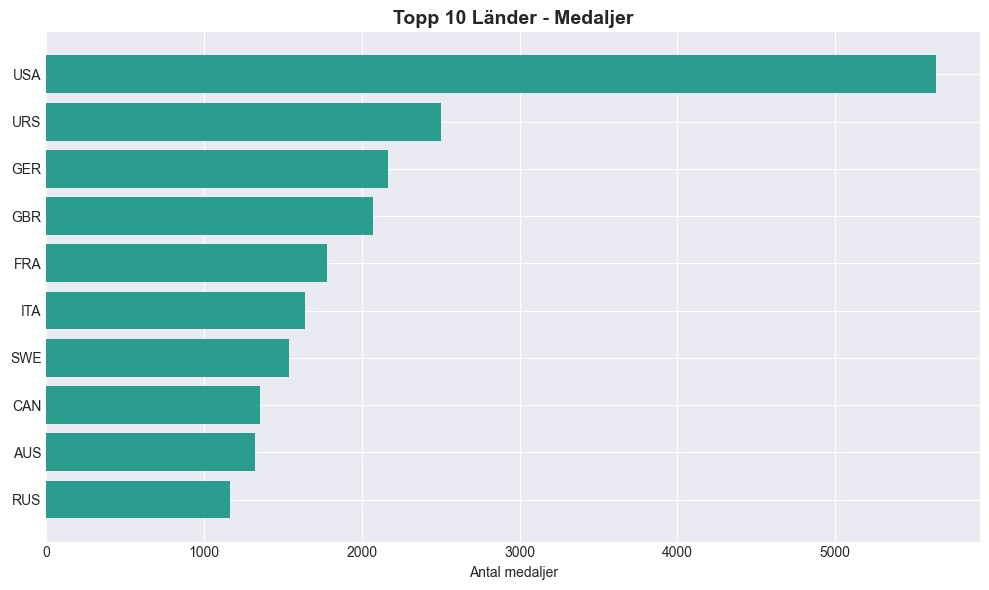

In [34]:
# Ensure imports are available
try:
    plt
except NameError:
    import matplotlib.pyplot as plt
    import pandas as pd

# Check if df exists
if 'df' not in globals():
    raise NameError("Please run Cell 2 first to load the data!")

# 3.2 Top 10 countries by medals - Create own figure
fig, ax = plt.subplots(figsize=(10, 6))
medal_counts = df[df['Medal'].notna()]['NOC'].value_counts().head(10)
ax.barh(medal_counts.index, medal_counts.values, color='#2A9D8F')
ax.invert_yaxis()
ax.set_title('Topp 10 Länder - Medaljer', fontsize=14, fontweight='bold')
ax.set_xlabel('Antal medaljer')
plt.tight_layout()
plt.savefig('../figures/top10_countries_medals.png', dpi=300, bbox_inches='tight')
plt.show()


### 3.3 Medaljer över tid


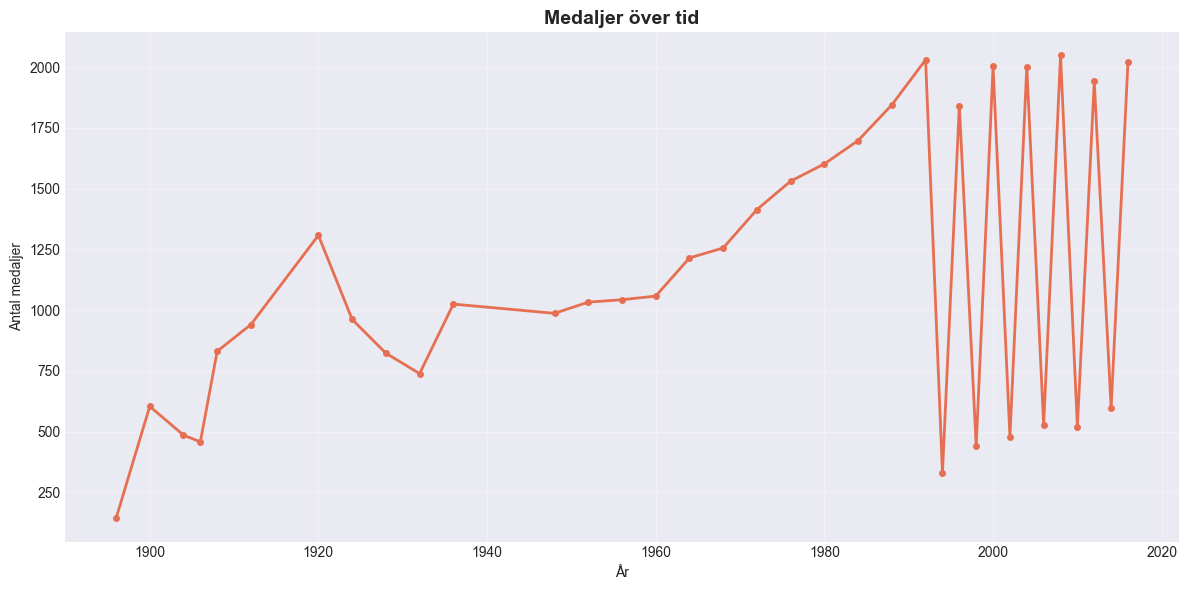

In [35]:
# Ensure imports are available
try:
    plt
except NameError:
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np

# Check if df exists
if 'df' not in globals():
    raise NameError("Please run Cell 2 first to load the data!")

# 3.3 Medals over time - Create own figure
fig, ax = plt.subplots(figsize=(12, 6))
medals_over_time = df[df['Medal'].notna()].groupby('Year').size()
ax.plot(medals_over_time.index, medals_over_time.values, 
        marker='o', color='#E76F51', linewidth=2, markersize=4)
ax.set_title('Medaljer över tid', fontsize=14, fontweight='bold')
ax.set_xlabel('År')
ax.set_ylabel('Antal medaljer')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../figures/medals_over_time.png', dpi=300, bbox_inches='tight')
plt.show()


### 3.4 Åldersfördelning


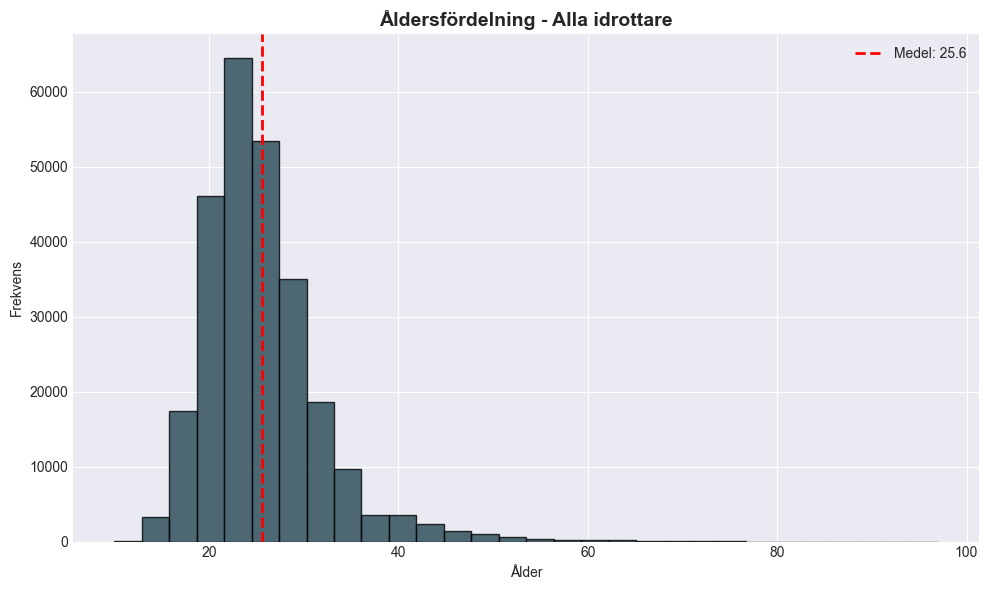

In [36]:
# Ensure imports are available
try:
    plt
except NameError:
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np

# Check if df exists
if 'df' not in globals():
    raise NameError("Please run Cell 2 first to load the data!")

# 3.4 Age distribution - Create own figure
fig, ax = plt.subplots(figsize=(10, 6))
ages = df['Age'].dropna()
ax.hist(ages, bins=30, color='#264653', alpha=0.8, edgecolor='black')
ax.set_title('Åldersfördelning - Alla idrottare', fontsize=14, fontweight='bold')
ax.set_xlabel('Ålder')
ax.set_ylabel('Frekvens')
ax.axvline(ages.mean(), color='red', linestyle='--', linewidth=2, label=f'Medel: {ages.mean():.1f}')
ax.legend()
plt.tight_layout()
plt.savefig('../figures/age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


## 4. Kanada-specifik Analys

### 4.1 Översikt - Kanadas Prestation

In [37]:
# Filtrera för Kanada
canada_df = df[df['NOC'] == 'CAN']

print(f"Totalt antal deltagare från Kanada: {len(canada_df)}")
print(f"Unika idrottare från Kanada: {canada_df['ID'].nunique()}")
print(f"Antal medaljer för Kanada: {canada_df['Medal'].notna().sum()}")

# Medaljfördelning
canada_medals = canada_df[canada_df['Medal'].notna()]['Medal'].value_counts()
print(f"\nMedaljfördelning för Kanada:")
print(canada_medals)


Totalt antal deltagare från Kanada: 9733
Unika idrottare från Kanada: 4811
Antal medaljer för Kanada: 1352

Medaljfördelning för Kanada:
Medal
Gold      463
Bronze    451
Silver    438
Name: count, dtype: int64


### 4.2 Kanadas Toppsporter

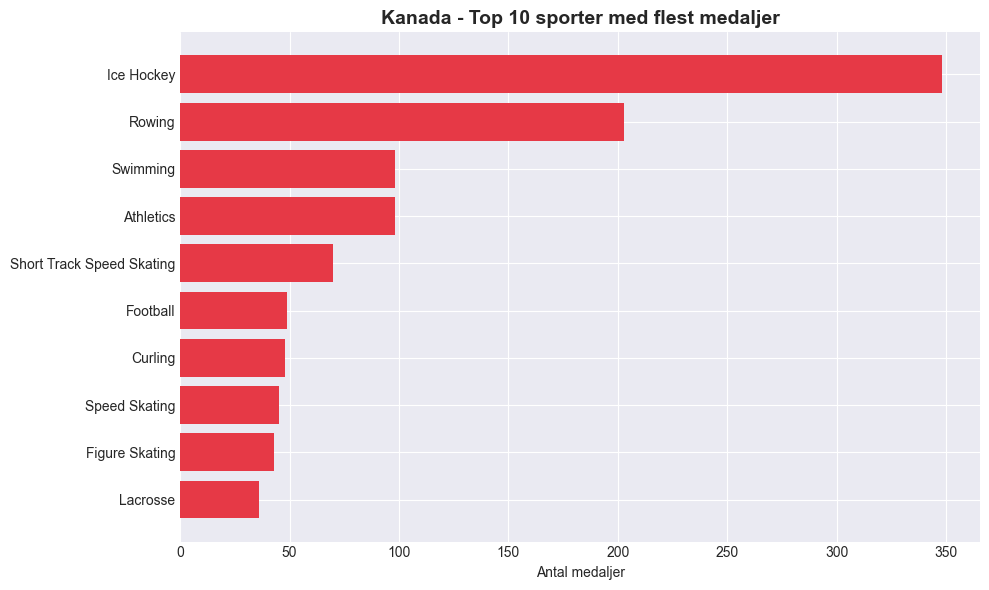

In [38]:
# Top sports for Canada
canada_top_sports = canada_df[canada_df['Medal'].notna()]['Sport'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(canada_top_sports.index, canada_top_sports.values, color='#E63946')
ax.invert_yaxis()
ax.set_title('Kanada - Top 10 sporter med flest medaljer', fontsize=14, fontweight='bold')
ax.set_xlabel('Antal medaljer')
plt.tight_layout()
plt.savefig('../figures/canada_top_sports.png', dpi=300, bbox_inches='tight')
plt.show()


### 4.3 Kanadas Medaljer per OS

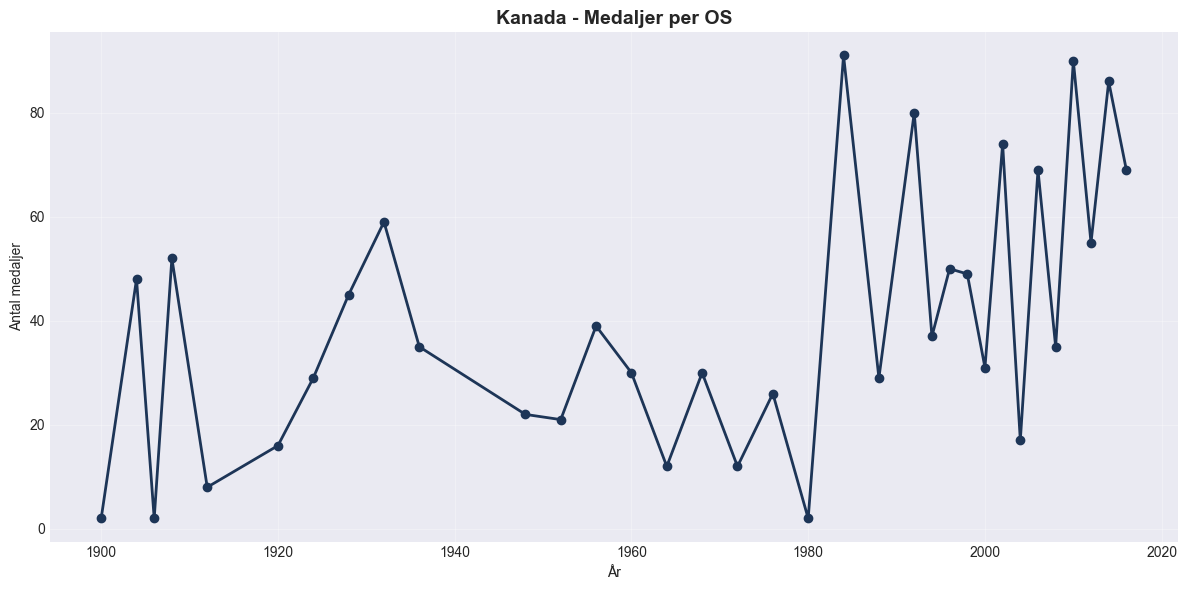

In [39]:
# Canada medals per Olympics
canada_medals_year = canada_df[canada_df['Medal'].notna()].groupby('Year').size()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(canada_medals_year.index, canada_medals_year.values, 
        marker='o', color='#1D3557', linewidth=2, markersize=6)
ax.set_title('Kanada - Medaljer per OS', fontsize=14, fontweight='bold')
ax.set_xlabel('År')
ax.set_ylabel('Antal medaljer')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../figures/canada_medals_per_year.png', dpi=300, bbox_inches='tight')
plt.show()


### 4.4 Kanadas Åldersfördelning

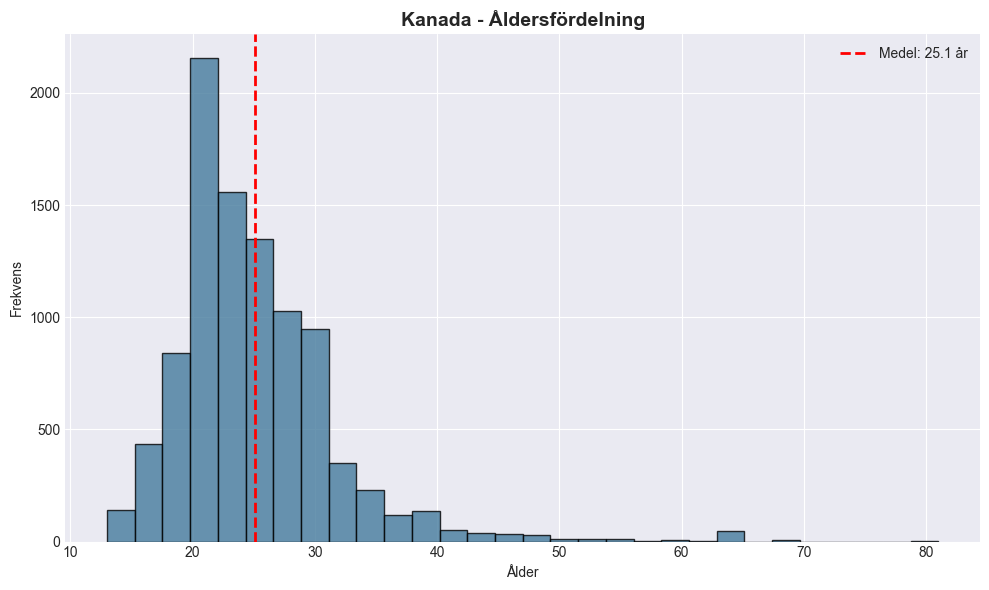

Kanada - Åldersstatistik:
Medel: 25.1 år
Median: 24.0 år
Min: 13.0 år
Max: 81.0 år


In [40]:
# Canada age distribution
canada_ages = canada_df['Age'].dropna()

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(canada_ages, bins=30, color='#457B9D', alpha=0.8, edgecolor='black')
ax.axvline(canada_ages.mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Medel: {canada_ages.mean():.1f} år')
ax.set_title('Kanada - Åldersfördelning', fontsize=14, fontweight='bold')
ax.set_xlabel('Ålder')
ax.set_ylabel('Frekvens')
ax.legend()
plt.tight_layout()
plt.savefig('../figures/canada_age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Kanada - Åldersstatistik:")
print(f"Medel: {canada_ages.mean():.1f} år")
print(f"Median: {canada_ages.median():.1f} år")
print(f"Min: {canada_ages.min()} år")
print(f"Max: {canada_ages.max()} år")


## 5. Sammanfattning

Detta notebook har genomfört en grundlig explorativ dataanalys av olympisk data med fokus på:

- ✅ Dataset översikt och grundläggande statistik
- ✅ Visualiseringar av könsfördelning, toppländer, medaljer över tid och åldersfördelning
- ✅ Djupgående analys av Kanadas prestation i olympiska spelen

**Nästa steg**: Använd denna analys som grund för dashboard-applikationen i Task 1-3.